In [103]:
'''
Author: Nischay Gowda nischaygowda105@gmail.com
Date: 2023-02-19 16:47:37
LastEditors: Nischay Gowda nischaygowda105@gmail.com
LastEditTime: 2023-02-19 18:53:56
FilePath: \Credit-Card-Fraud\notebooks\exp_data_analysis.ipynb
Description:
'''
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



In [104]:
DATA_LOCATION = 'G:\My Drive\Internship_work_related\DS Projects\Credit-Card-Fraud\data'

data_df = pd.read_csv(DATA_LOCATION + '\creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
# data_df.describe()
# No Null values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [106]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [107]:

# Data check
print(data_df['Class'].value_counts())
print('No Frauds', round(data_df['Class'].value_counts()[0]/len(data_df) * 100, 2), '% of dataset')
print('Frauds', round(data_df['Class'].value_counts()[1]/len(data_df) * 100, 2), '% of dataset')

0    284315
1       492
Name: Class, dtype: int64
No Frauds 99.83 % of dataset
Frauds 0.17 % of dataset


Dataset is higly imbalanced. Skewed data. There are 492 Fraud cases.

In [108]:
# scaling the Time and Amount column as the other columns. We need to create a sub sample of dataframe in order to have an equal amount of 
# fraud amd non-fraud cases, helping our algorithms better understand patterns.

# RobustScaler is robust to outliers. Sacles as per quartile ranges.
robust_scaler = RobustScaler()

data_df['scaled_time'] = robust_scaler.fit_transform(data_df['Time'].values.reshape(-1,1))
data_df['scaled_amount'] = robust_scaler.fit_transform(data_df['Amount'].values.reshape(-1,1))

# drop Time and Amount
data_df.drop(['Time','Amount'], axis = 1, inplace=True)


In [109]:
# rearrange data columns
scaled_amount = data_df['scaled_amount']
scaled_time = data_df['scaled_time']

data_df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace=True)
data_df.insert(0, 'scaled_time', scaled_time)
data_df.insert(1, 'scaled_amount', scaled_amount)

data_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [110]:
X = data_df.drop('Class', axis = 1)
y = data_df['Class']

data_split = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for train_idx, test_idx in data_split.split(X, y):
    print("Train:", train_idx, "Test:", test_idx)
    original_X_train, original_X_test = X.iloc[train_idx], X.iloc[test_idx]
    original_y_train, original_y_test = y.iloc[train_idx], y.iloc[test_idx]
    

# Turn into an array.
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values


train_unique_label, train_counts_label = np.unique(original_y_train, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts = True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label / len(original_y_train))
print(test_counts_label / len(original_y_test))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [111]:
# Random Undersampling
data_shuffle_df = data_df.sample(frac = 1)
# Return a random sample of items from an axis of object.

# amout of fraud classes 492 rows
fraud_df = data_shuffle_df.loc[data_shuffle_df['Class'] == 1]
non_fraud_df = data_shuffle_df.loc[data_shuffle_df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# shuffle the dataframe rows.
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
223826,0.691338,-0.167680,-1.199004,-0.180266,1.101302,-0.345553,-0.201895,0.064440,-0.474284,0.523476,-0.335942,0.523147,-2.076358,-1.605763,-2.033282,0.084325,0.067513,-1.186333,-0.247123,2.065408,-1.422998,-0.689437,-0.159232,0.292734,0.303809,0.486161,-0.074821,-0.529701,0.104500,-0.107169,0
42635,-0.511178,-0.148397,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,6.455828,-13.380222,0.545279,-13.026864,-0.453595,-13.251542,-22.883999,-9.287832,4.038231,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,1
60507,-0.415136,-0.269825,1.258277,1.019046,-2.026701,1.429707,1.175852,-0.948681,0.489676,-0.033063,0.038153,-1.510264,-0.193225,-2.187602,-2.860232,-2.832977,1.697025,1.121589,2.843893,1.507718,-0.861466,-0.220267,-0.269689,-0.779509,-0.249865,-1.169379,0.799632,-0.203139,0.036403,0.079223,0
42674,-0.511026,-0.286173,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,-13.542096,0.888248,-12.623316,1.002755,-12.432279,-23.241597,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1
42784,-0.510450,0.328233,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,-13.608143,7.127165,-12.611004,1.214556,-13.906297,1.514070,-11.125739,-19.716257,-7.552789,3.656787,-0.088342,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,1


Analysis and Data preprocessing

Distribution of Classes in subsample datatset
0    0.5
1    0.5
Name: Class, dtype: float64


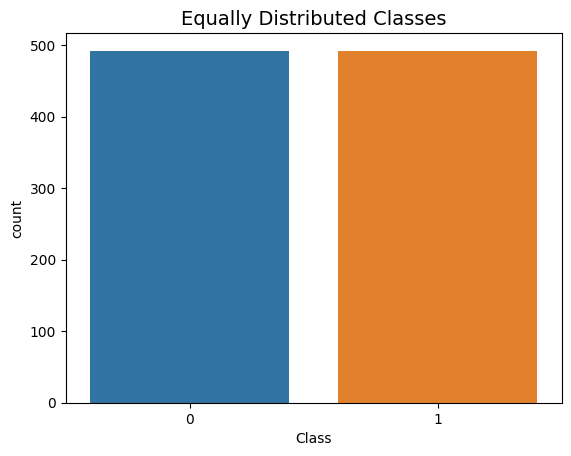

In [112]:
print('Distribution of Classes in subsample datatset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot(data = new_df, x = 'Class')
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()

### **Correlation Matrices**
- Corelation Matrixes are used to see which features are influencing heavily in wheather a specific transaction is fraud.
- This is applied on the subsample in order for us to see which features have high positive or negative correlation with regards to fraud transactions.

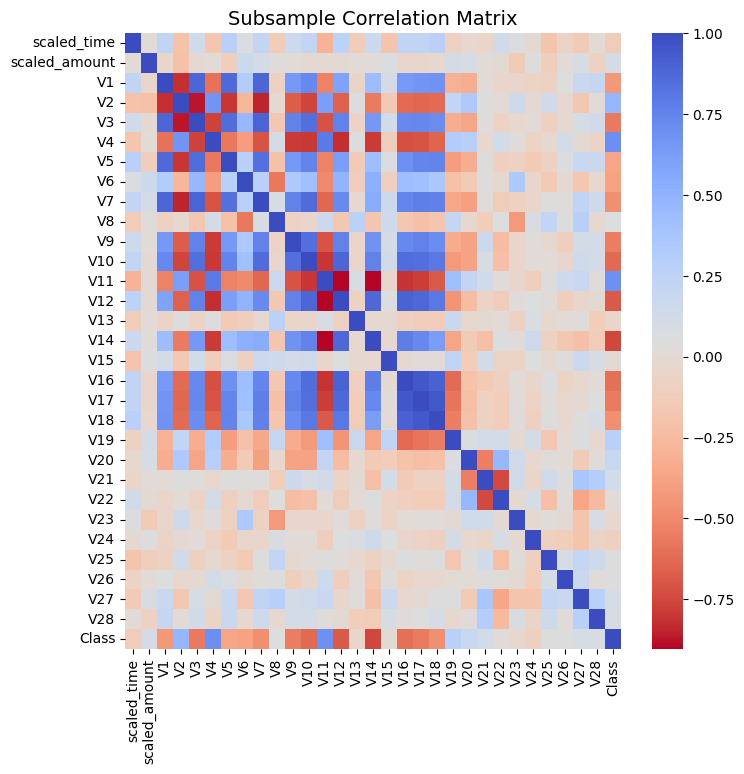

In [113]:
corr = new_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws={'size':30})
plt.title('Subsample Correlation Matrix', fontsize=14)
plt.show();

- Negative Correlations - V14, V17, V12 and V10 are negatively correlated. Lower these values, more the likely the end result will be Fraud transaction.
- Positive Correlations - V11, V2, V4, and V19 are postiively correlated. Higher these values, more the likely end result will be Fraud transaction.

- Box plot : boxplots for better understanding of the distribution of these features in fradulant and non-fraudulant transactions.

### Negative Correlation box plots.

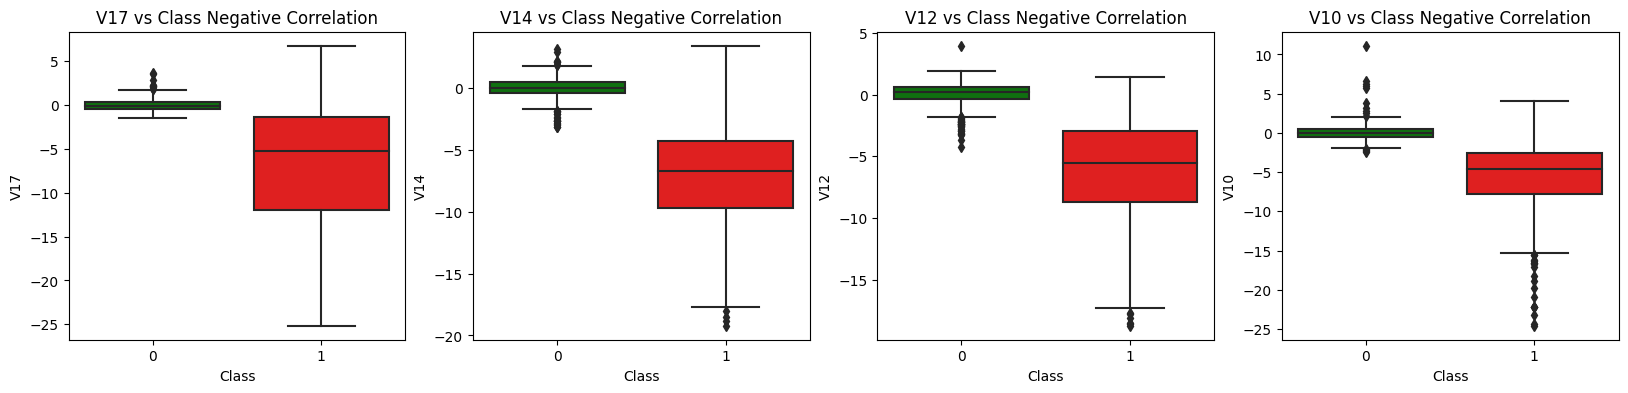

In [114]:
# V14, V17, V12, V10
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = {0: "g", 1: "r"}

# V17
sns.boxplot(x='Class', y='V17', data=new_df, ax=axes[0], palette=colors)
axes[0].set_title('V17 vs Class Negative Correlation');

# V14
sns.boxplot(x='Class', y='V14', data=new_df, ax=axes[1], palette=colors)
axes[1].set_title('V14 vs Class Negative Correlation');

# V12
sns.boxplot(x='Class', y='V12', data=new_df, ax=axes[2], palette=colors)
axes[2].set_title('V12 vs Class Negative Correlation');

# V10
sns.boxplot(x='Class', y='V10', data=new_df, ax=axes[3], palette=colors)
axes[3].set_title('V10 vs Class Negative Correlation');


### Positive Correlation box plots

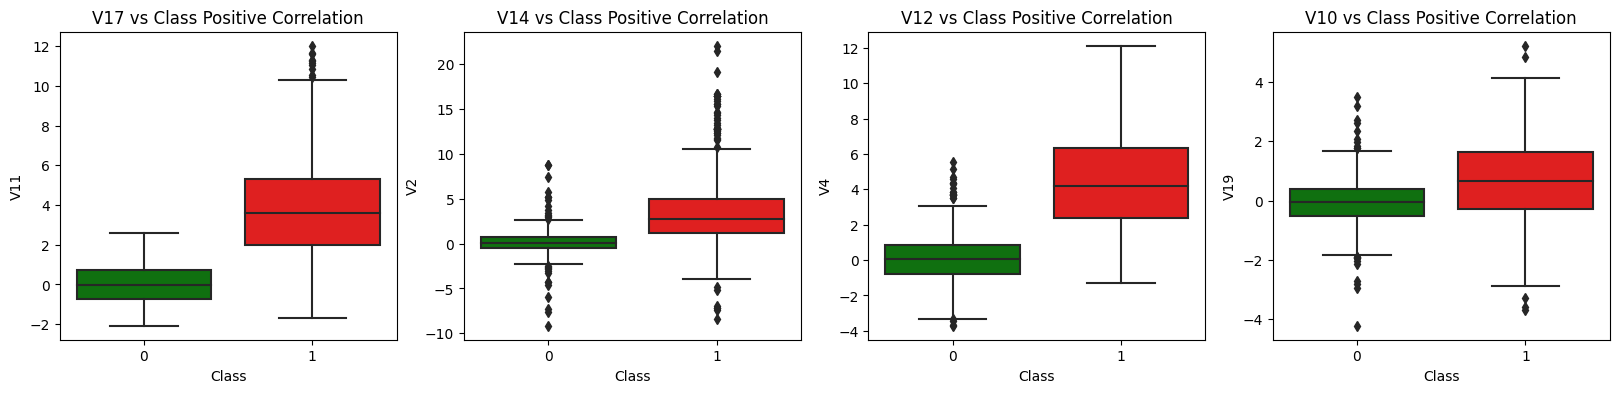

In [115]:
# V11, V2, V4, V19
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = {0: "g", 1: "r"}

# V17
sns.boxplot(x='Class', y='V11', data=new_df, ax=axes[0], palette=colors)
axes[0].set_title('V17 vs Class Positive Correlation');

# V14
sns.boxplot(x='Class', y='V2', data=new_df, ax=axes[1], palette=colors)
axes[1].set_title('V14 vs Class Positive Correlation');

# V12
sns.boxplot(x='Class', y='V4', data=new_df, ax=axes[2], palette=colors)
axes[2].set_title('V12 vs Class Positive Correlation');

# V10
sns.boxplot(x='Class', y='V19', data=new_df, ax=axes[3], palette=colors)
axes[3].set_title('V10 vs Class Positive Correlation');

### Anamoly detection 
Our main aim is to remove outliers from features that have a high correlation with our classes. 
- Using Interquartile Range
- Outlier removal tradeoff

c:\Users\nisch\anaconda3\envs\portfolio\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
c:\Users\nisch\anaconda3\envs\portfolio\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_pat

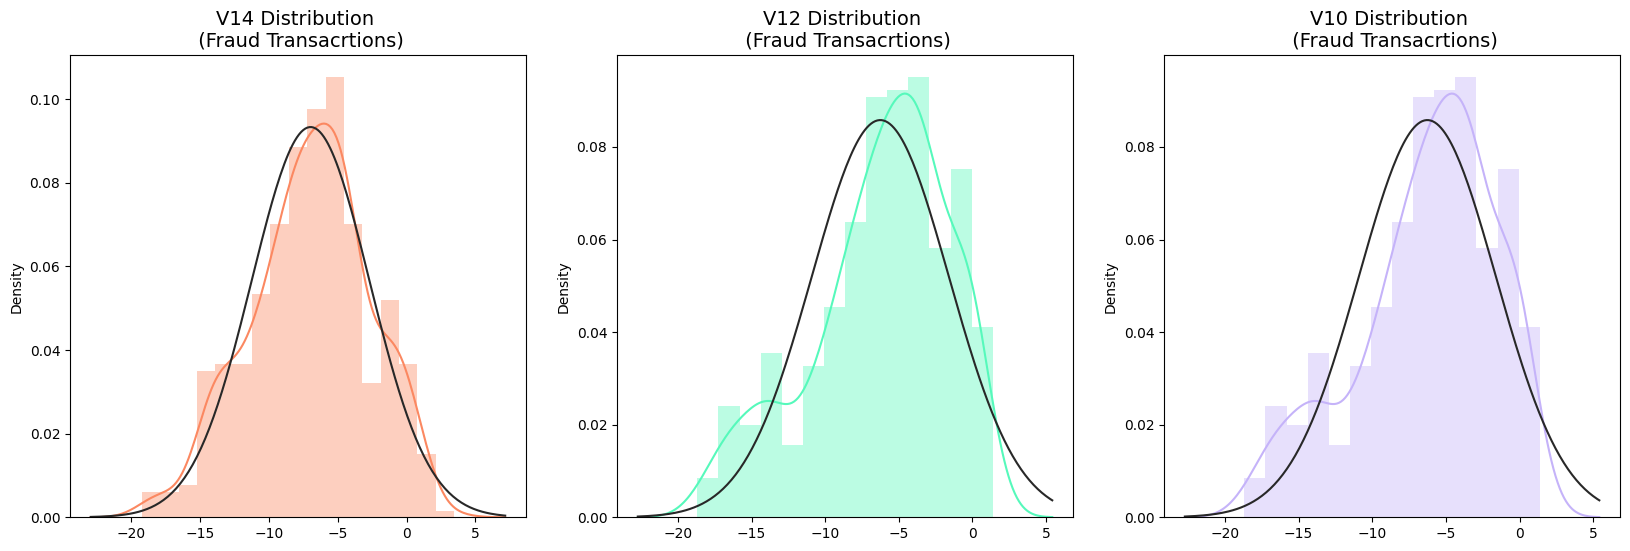

In [116]:
# Visualize the distribution of data.
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6));

V14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(V14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transacrtions)', fontsize=14);

V12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(V12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transacrtions)', fontsize=14);

V10_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(V10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transacrtions)', fontsize=14);

In [117]:
# V14 removing outliers (highest Negative Correlated with labels)

print('V14 removing outliers ' + '-----' * 25)
V14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
print('Quartile 25: {} and Quartile 75: {}'.format(q25, q75))
V14_iqr = q75 - q25
print('iqr: {}'.format(V14_iqr))

V14_cut_off = V14_iqr * 1.5  # 1.5 times the IQR.
V14_lower_bound, V14_upper_bound = q25-V14_cut_off, q75+V14_cut_off
print('Cut Off: {}'.format(V14_cut_off))
print('V14 Lower: {}'.format(V14_lower_bound))
print('V14 Upper: {}'.format(V14_upper_bound))

# outliers
outliers = [x for x in V14_fraud if x < V14_lower_bound or x > V14_upper_bound]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 Outliers:{}'.format(outliers))

# Remove outlier from main DF
new_df = new_df.drop(new_df[(new_df['V14'] > V14_upper_bound) | (new_df['V14'] < V14_lower_bound)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

print('-----' * 30)
print('-----' * 30)

# V12 removing outliers (highest Negative Correlated with labels)

print('V12 removing outliers ' + '-----' * 25)
V12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
print('Quartile 25: {} and Quartile 75: {}'.format(q25, q75))
V12_iqr = q75 - q25
print('iqr: {}'.format(V12_iqr))

V12_cut_off = V12_iqr * 1.5  # 1.5 times the IQR.
V12_lower_bound, V12_upper_bound = q25-V12_cut_off, q75+V12_cut_off
print('Cut Off: {}'.format(V12_cut_off))
print('V12 Lower: {}'.format(V12_lower_bound))
print('V12 Upper: {}'.format(V12_upper_bound))

# outliers
outliers = [x for x in V12_fraud if x < V12_lower_bound or x > V12_upper_bound]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 Outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > V12_upper_bound) | (new_df['V12'] < V12_lower_bound)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('-----' * 30)
print('-----' * 30)

# V12 removing outliers (highest Negative Correlated with labels)

print('V10 removing outliers ' + '-----' * 25)
V10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(V10_fraud, 25), np.percentile(V10_fraud, 75)
print('Quartile 25: {} and Quartile 75: {}'.format(q25, q75))
V10_iqr = q75 - q25
print('iqr: {}'.format(V10_iqr))

V10_cut_off = V10_iqr * 1.5  # 1.5 times the IQR.
V10_lower_bound, V10_upper_bound = q25-V10_cut_off, q75+V10_cut_off
print('Cut Off: {}'.format(V10_cut_off))
print('V10 Lower: {}'.format(V10_lower_bound))
print('V10 Upper: {}'.format(V10_upper_bound))

# outliers
outliers = [x for x in V10_fraud if x < V10_lower_bound or x > V10_upper_bound]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 Outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] > V10_upper_bound) | (new_df['V10'] < V10_lower_bound)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('-----' * 30)
print('-----' * 30)


V14 removing outliers -----------------------------------------------------------------------------------------------------------------------------
Quartile 25: -9.692722964972386 and Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 Outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
Number of Instances after outliers removal: 980
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
V12 removing outliers -----------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 and Quartile 7

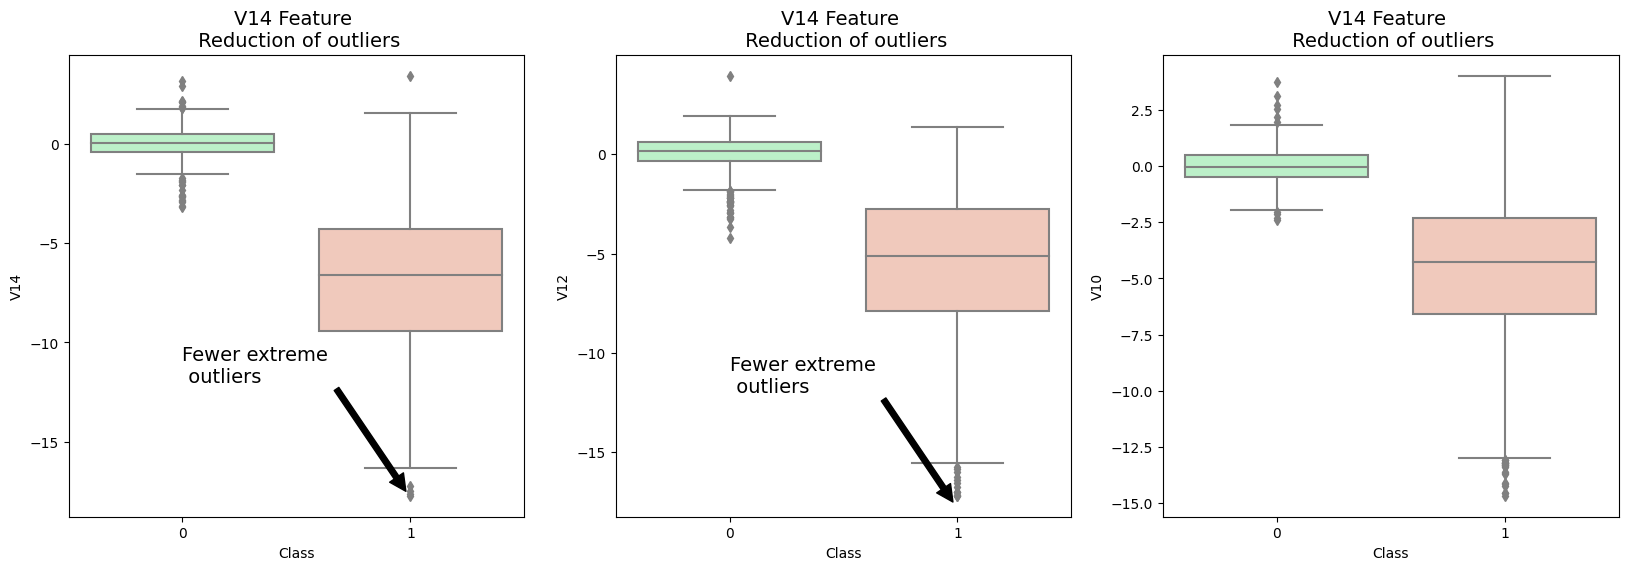

In [118]:
# Box plot after removal of outliers.
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# arrow point to outliers.
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14);

# Feature V12
sns.boxplot(x="Class", y="V12", data=new_df,ax=ax2, palette=colors)
ax2.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14);

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df,ax=ax3, palette=colors)
ax3.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12), arrowprops=dict(facecolor='black'), fontsize=14);

### Dimensionality Reduction and Clustering
- t-SNE
- PCA
- Truncated SVD

In [119]:
# New df is from random undersample data.
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
tsne_model = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne_model.fit_transform(X.values)
t1 = time.time()
print('t-SNE took {:.2} s'.format(t1-t0))

# PCA Implementation
t0 = time.time()
PCA_model = PCA(n_components=2, random_state=42)
X_reduced_pca = PCA_model.fit_transform(X.values)
t1 = time.time()
print(' PCA took {:.2} s'.format(t1-t0))

# TSVD Implementation
t0 = time.time()
TSVD_model = TruncatedSVD(n_components=2, random_state=42)
X_reduced_svd = TSVD_model.fit_transform(X.values)
t1 = time.time()
print('TruncatedSVD took {:.2} s'.format(t1-t0))



c:\Users\nisch\anaconda3\envs\portfolio\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\nisch\anaconda3\envs\portfolio\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE took 4.5 s
 PCA took 0.0062 s
TruncatedSVD took 0.004 s


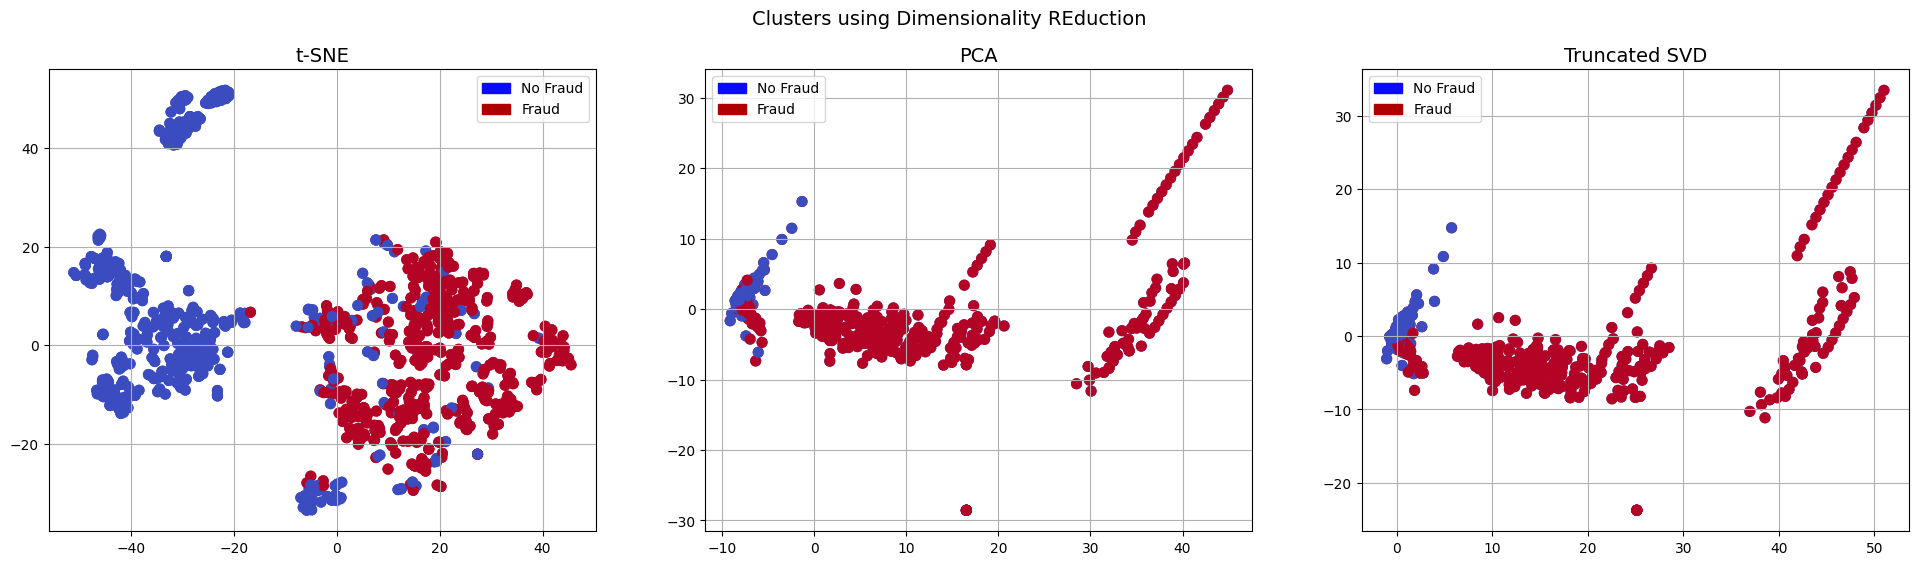

In [120]:
# 
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6));
f.suptitle('Clusters using Dimensionality REduction', fontsize=14);

green_cluster = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_cluster = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[green_cluster, red_cluster]);

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[green_cluster, red_cluster]);

# Truncated SVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[green_cluster, red_cluster]);
plt.show();


### Classifiers


In [121]:
# Undersampling before cross validation (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [122]:
# Data is already scaled.
# explicitly used for undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# values into array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [125]:
# Classifiers
classifiers = {
                'LogisticRegression': LogisticRegression(),
                'KNearest': KNeighborsClassifier(),
                'Support Vector Classifier': SVC(),
                'DecisionTreeClassifier': DecisionTreeClassifier()
              }

for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  model_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classifiers: ", key, 'has a training score of ', round(model_score.mean(),2)*100, "% accuracy score")


Classifiers:  LogisticRegression has a training score of  94.0 % accuracy score
Classifiers:  KNearest has a training score of  92.0 % accuracy score
Classifiers:  Support Vector Classifier has a training score of  93.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of  88.0 % accuracy score
